# Single Tree and Bagging


In [15]:
#In this notebook, we perform SVM an logit model fitting and compare their decision boundaries.

import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

import pandas as pd

from sklearn import tree




In [3]:
# Set of features
state_cols = ['log_TA','NI_to_TA', 'Equity_to_TA', 'NPL_to_TL', 'REO_to_TA', 
              'ALLL_to_TL', 'core_deposits_to_TA', 'brokered_deposits_to_TA', 
              'liquid_assets_to_TA', 'loss_provision_to_TL', 'NIM', 'assets_growth']

all_MEVs = ['term_spread',
                    'stock_mkt_growth',
                    'real_gdp_growth',
                    'unemployment_rate_change',
                    'treasury_yield_3m',
                    'bbb_spread',
                    'bbb_spread_change']

In [4]:
#To read the following data you will need to install h5py and its dependency tables. If tables was not installed
#through conda try pip
import h5py
data=pd.read_hdf("C:/......./df_train_FDIC_defaults_1Y.h5")


In [5]:
data.head()

,,Financial Institution Name,Institution Name,total_assets,defaulter,Failure / Assistance,log_TA,NI_to_TA,Equity_to_TA,NPL_to_TL,REO_to_TA,...,loss_provision_to_TL_plus_1Q,ROA_plus_1Q,NIM_plus_1Q,assets_growth_plus_1Q,default_within_1Y,Failure,max_total_assets,num_records,non_defaulter,const
IDRSSD,date,,,,,,,,,,,,,,,,,,,,,
904957,2008-03-31,COLORADO NATIONAL BANK,COLORADO NATIONAL BANK,142138.0,1.0,FAILURE,-0.048734,-6.505183,-0.759562,0.880756,-0.162301,...,0.004823,-0.367905,-0.840312,-0.582232,1.0,1.0,142138.0,31.0,0.0,1
202907,2011-06-30,"COMMUNITY BANK, NATIONAL ASSOCIATION",NaN,6364903.0,0.0,NaN,2.754852,0.143005,0.249275,-0.405931,-0.327268,...,-0.003057,0.205816,-0.140365,0.003962,0.0,NaN,8494486.0,60.0,1.0,1
652874,2012-12-31,"NEXBANK, SSB",NaN,784781.0,0.0,NaN,1.211269,0.229021,-0.301031,-0.750449,-0.304600,...,-0.003506,0.470935,-0.799310,0.284815,0.0,NaN,2698563.0,60.0,1.0,1
9115,2003-03-31,COMMERCE BANK/SHORE NATIONAL ASSOCIATION,NaN,2173481.0,0.0,NaN,1.962490,0.253469,-0.922810,-0.752942,-0.374868,...,-0.002819,0.225454,-0.324276,1.091618,0.0,NaN,2697759.0,12.0,1.0,1
3344611,2012-06-30,"BANK OF AMERICA RHODE ISLAND, NATIONAL ASSOCIA...",NaN,19405460.0,1.0,NaN,3.576923,0.103615,0.088508,2.380231,-0.121243,...,0.001903,0.101099,-0.791229,-0.408817,0.0,NaN,39211041.0,31.0,0.0,1


In [6]:
X=pd.concat([data[all_MEVs],data[state_cols]],axis=1)
y=data['default_within_1Y']
#Standardizing
X=(X-np.mean(X))/np.std(X)

In [7]:
X.shape

(641, 19)

In [8]:
seed=42

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
# Split dataset into training set and test set for y_return1 for 80% training, 20% testing. No data
#for hyperparameter cross validation is considered.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                                  random_state=seed) 


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [21]:


model_single_tree = DecisionTreeClassifier(random_state=0,criterion = 'entropy')



In [22]:
#Fiiting and calculating the score of the model_single_tree. You can observe how overfitting the tree models are
model_single_tree.fit(X_train,y_train)
print("Score of the traiing data: ", model_single_tree.score(X_train,y_train))

Score of the traiing data:  1.0


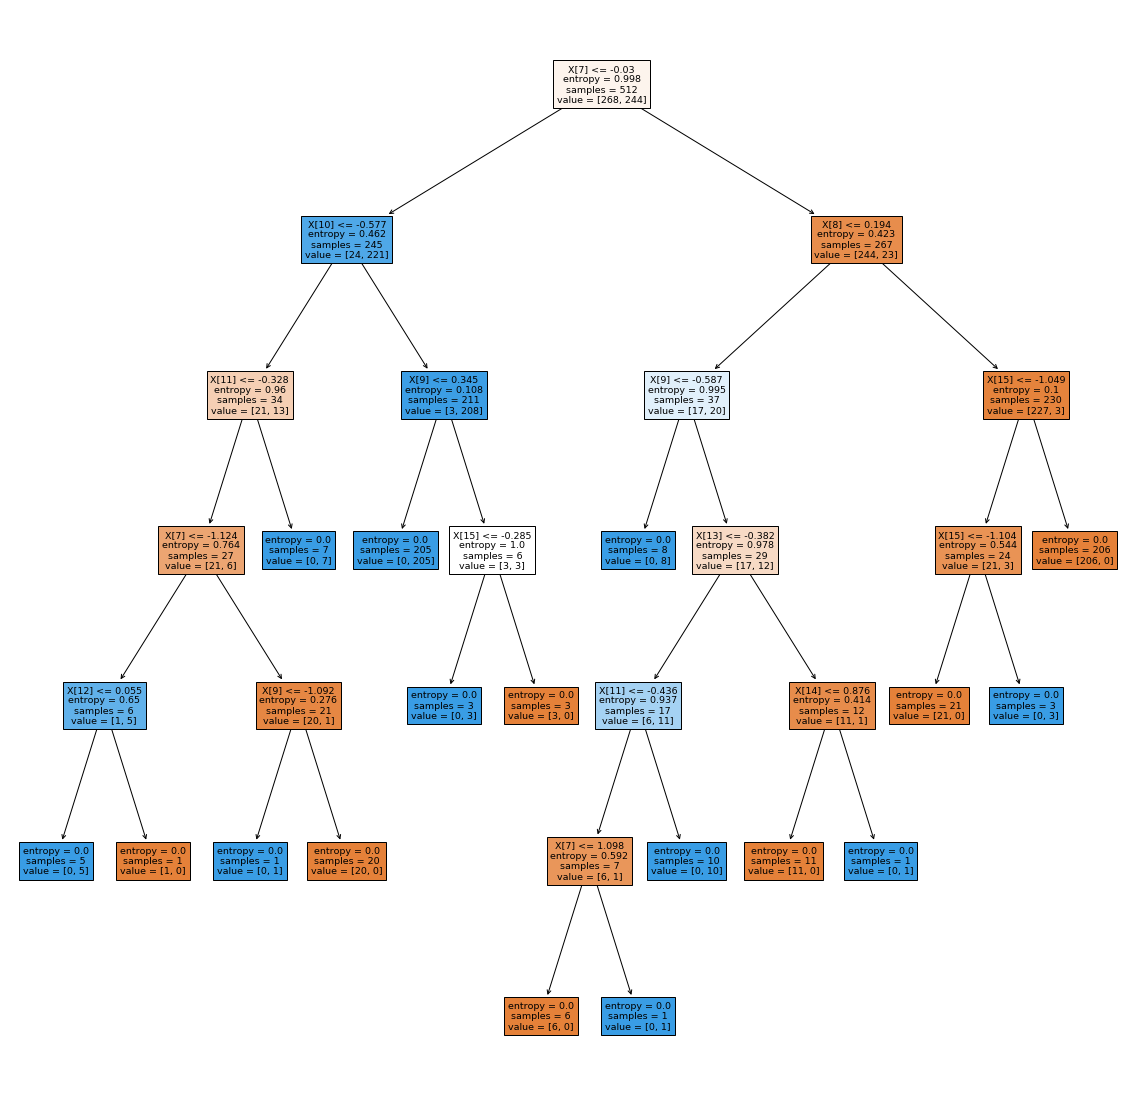

In [23]:
plt.figure(figsize=(20,20))
tree.plot_tree(model_single_tree,filled=True)
pass

In [24]:
#Calculating the score on the test dataset. Note that this high score could be due to a leakage in the data.
#Unfortunaltey, since we do not have the data description, we cannot investiage this.
model_single_tree.score(X_test,y_test)

0.9069767441860465

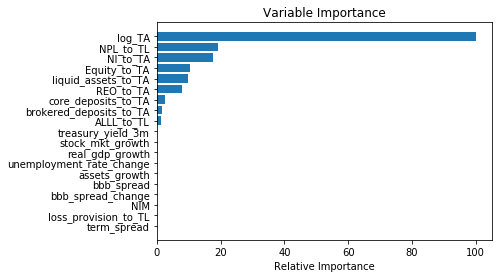

In [25]:
# Feature importance is a very important characteristics of tree models. In what follows, we plot feature importance
# for the above tree model
feature_importance = model_single_tree.feature_importances_
# make importances relative to max importance; you may try other crietria
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [26]:
#Now we compare this to logistic regression. Note that this compariosn is done for the particualr seed. What do you observe
#from this compariosn?
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(random_state=0,max_iter=400).fit(X_train, y_train)
clf_logistic.score(X_train,y_train)

0.970703125

In [27]:
clf_logistic.score(X_test,y_test)

0.9767441860465116

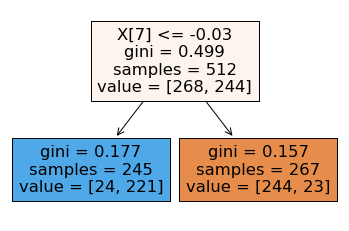

In [28]:
#A decision stump is a tree with the depth of one.
#Let us fit one to the training dataset.
model_stump = DecisionTreeClassifier(random_state=0,max_depth=1).fit(X_train,y_train)
tree.plot_tree(model_stump,filled=True)
pass

In [29]:
#Surprisingly, the stump model has a good score on the test dataset, the same as model_single_tree. 
#Again note that this is more specific.
#to this dataset rather than the good property of the stump model. 
model_stump.score(X_test,y_test)

0.8837209302325582

In [30]:
from sklearn.ensemble import BaggingClassifier


In [35]:
#Exercise 3 --- one or two  lines of coding - [2/30]
#1. Fit a bagging classifier model where the base model is model_stump as above, the number of feature to 
#   be used for each model_stump each time is 4, the number of base estimator is 4000, samples are drawn with replacement,
#   and finally the random state is 0. Call the model: "model_bagg".
#2. Calculate the score on the test dataset


model_bagg=BaggingClassifier(base_estimator=model_stump,
                        n_estimators=4000,bootstrap=True,max_features=4,random_state=0).fit(X_train, y_train)
#As you see, there is an improvement over the stump tree models.
model_bagg.score(X_test,y_test)

0.9457364341085271